<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Introduction
<a class="anchor" id="1"></a> 

📚 In this notebook, we'll dive into the following topics:
1. 📊 Performing straightforward data analysis.
2. 🎯 Selecting features that exhibit greater similarity to our target.
3. 🖥️ Implementing linear regression from scratch with minibatch gradient descent.
4. 📈 Fitting the model and leveraging it for predictions.

We'll be working with the "wine-quality-dataset" throughout this notebook. Let's embark on this learning journey! 🍇🍷

This notebook is divided into several sections which are:

# **Table of Contents**
> 1. [Importing Libraries](#2)
> 2. [Loading & Analyzing Data](#3)
> 3. [Splitting Feature & Target](#4)
> 4. [Feature Selection](#5)
> 5. [Scaling & Normalizing Data](#6)
> 6. [Defining a Data Iterator](#7)
> 7. [Defining Model: Linear Regression](#5)
> 8. [Initializing Parameters](#6)
> 9. [Defining Cost Function](#7)
> 10. [Optimization Algorithm](#5)
> 11. [Training Loop](#6)
> 12. [Evaluating Accuracy](#7)

<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Importing Libraries
<a class="anchor" id="2"></a> 

We import:-
* ***pandas*** for loading and analyzing our data.
* ***numpy*** for fitting a model to our data and for making predictions
* ***random*** for randomly shuffling our data
* ***matplotlib.pyplot*** for data visualization
* ***train_test_split*** for splitting our train and test set
* ***mutual_info_regression*** for feature selection
* ***preprocessing*** for applying normalization

In [1]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn import preprocessing

<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Loading & Analyzing Data
<a class="anchor" id="3"></a> 

We load the **Wine Quality Dataset** and store it in a pandas dataframe.

In [2]:
df = pd.read_csv("../input/wine-quality-dataset/WineQT.csv")

Next we shall take a peek at our data

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Next we take a look at some certain information(index, data type, column names, non-null values and memory usage) of our dataset using the function **info()**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Next we look at some descriptive statistics of our dataset such as the count, mean, median, standard deviation, the quartiles, maximum and minimum using the function **describe()**.

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Now we check if there are any missing values or null values in our data for each column respectively.

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

So there are no missing values in our data

<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Splitting Feature & Target
<a class="anchor" id="4"></a> 

Since we are to make predictions for the quality of wine, the column ***quality*** is to be considered the ***target*** vector, we denote it by ***y***. We make a feature matrix ***X*** by dropping the ***target*** column from our dataset.

In [7]:
y = df["quality"]
X = df.loc[:, df.columns!='quality']

We also don't need the column ***Id*** so we can drop it as well from our feature matrix ***X***.

In [8]:
X = X.drop("Id", axis = 1)

Now let us take a peek into our feature matrix ***X***.

In [9]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


We also take a peek into our target vector ***y***.

In [10]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

We then split our dataset into train and test set where 80% of our data is for model training and 20% is used for making predictions and validating our model.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Feature Selection
<a class="anchor" id="5"></a> 

We calculate the ***Mutual information*** scores of our features with respect to the target. Mutual information measures the similarity between each of the features and the target variable.

In [12]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train, y_train)

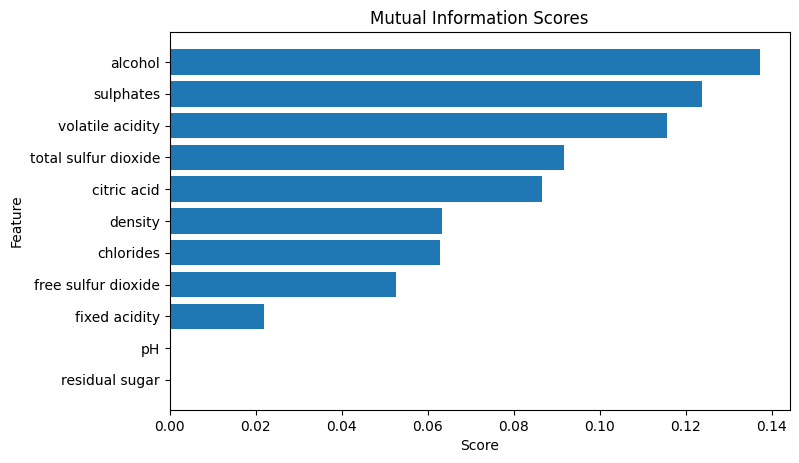

In [13]:
def plot_utility_scores(scores):
    y = scores.sort_values(ascending=True)
    width = np.arange(len(y))
    ticks = list(y.index)
    plt.barh(width, y)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plt.xlabel("Score")
plt.ylabel("Feature")
plot_utility_scores(mi_scores)



We can see from the above plot that alcohol has the highest similarity with wine quality. 
<br> We will drop the features that have a mutual information score less than 0.04 as these features aren't much similar to our target vector and are less significant in prediction.

In [14]:

#drop_cols = ["free sulfur dioxide","residual sugar","pH","fixed acidity","density"]
drop_cols = ["free sulfur dioxide","residual sugar","pH","volatile acidity","density","total sulfur dioxide","chlorides"]
X_train = X_train.drop(drop_cols,axis=1)
X_test = X_test.drop(drop_cols,axis=1)

Now we can see that we have a total of six features remaining.

In [15]:
X_train.columns, X_test.columns

(Index(['fixed acidity', 'citric acid', 'sulphates', 'alcohol'], dtype='object'),
 Index(['fixed acidity', 'citric acid', 'sulphates', 'alcohol'], dtype='object'))

<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Scaling & Normalizing Data
<a class="anchor" id="6"></a> 

We use **MinMaxScaler()** for normalizing our data. We fit the scaler to our trainig data and transform it accordingly.

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)

We transoform our test data using the scaler which we fitted to our training data.

In [17]:
X_test = min_max_scaler.transform(X_test)

Now all the values of our train and test features should be in the range 0-1.

In [18]:
print(f'Training data:\n{X_train[0:5]}\nTest data:\n{X_test[0:5]}')

Training data:
[[0.35454545 0.56       0.25149701 0.375     ]
 [0.48181818 0.56       0.23952096 0.53571429]
 [0.39090909 0.36       0.21556886 0.60714286]
 [0.18181818 0.04       0.13772455 0.26785714]
 [0.27272727 0.25       0.14371257 0.125     ]]
Test data:
[[0.2        0.04       0.16167665 0.19642857]
 [0.20909091 0.21       0.23353293 0.14880952]
 [0.21818182 0.12       0.08982036 0.375     ]
 [0.29090909 0.68       0.43712575 0.125     ]
 [0.71818182 0.49       0.24550898 0.625     ]]


The **MinMaxScaler()** automatically transforms our data to numpy array. So *X_train* and *X_test* are now numpy arrays. But we have to manually convert *y_train* and *y_test* to numpy arrays.

In [19]:
y_train = y_train.astype('float32').to_numpy().astype(np.float32)
y_test = y_test.astype('float32').to_numpy().astype(np.float32)

<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Defining a Data Iterator
<a class="anchor" id="7"></a> 

We define a generator function data_iter() that returns us a minibatch of data. Each minibatch consists of a tuple of features
and targets.

In [20]:
def data_iter(batch_size, features, targets):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],targets[batch_indices]

Let us read and print the first small batch of data examples.

In [21]:
batch_size = 10
for X, y in data_iter(batch_size, X_train, y_train):
    print(X,'\n',X.shape[0], '\n', y)
    break

[[0.3        0.36       0.1257485  0.5       ]
 [0.20909091 0.11       0.19161677 0.53571429]
 [0.33636364 0.25       0.11976048 0.25      ]
 [0.3        0.06       0.07784431 0.17857143]
 [0.39090909 0.45       0.25748503 0.625     ]
 [0.23636364 0.06       0.1257485  0.19642857]
 [0.43636364 0.56       0.35329341 0.58928571]
 [0.14545455 0.06       0.1257485  0.63392857]
 [0.64545455 0.63       0.21556886 0.44642857]
 [0.38181818 0.4        0.2754491  0.60714286]] 
 10 
 [7. 6. 5. 5. 7. 5. 8. 5. 6. 7.]


As we run the iteration, we obtain distinct minibatches successively until the entire dataset has
been exhausted.

<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Defining Model: Linear Regression
<a class="anchor" id="8"></a>

Linear regression is a linear approach to modelling the relationship between one dependent variable and one or more independent variables using a straight line.
The straight line is represented such: $$y = w*X+b$$

where,
<br>w = weight
<br>b = bias
<br>X = feature matrix(independent variables)
<br>y = target vector(dependent variable)




In [22]:
def linear_regression(X, w, b): #@save
    """The linear regression model."""
    return np.dot(X, w) + b

<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Initializing Parameters
<a class="anchor" id="9"></a>

The values for weight parameters are initialized taking values from the normal distribution with a mean of 0 and standard deviation of 0.1.
<br> The bias is initialized with 0.

In [23]:
def initialize_params():
    w = np.random.normal(0, 0.1, size=(X_train.shape[1], 1)).astype(np.float32)
    b = np.zeros(1).astype(np.float32)
    return w,b

<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Defining Cost Function
<a class="anchor" id="10"></a>

The cost function is used to calculate the error in our predicted value. We will use the mean squared error as our cost function. The cost function **J** is defined such:
$$ J  = {1 \over 2m} \sum\limits_{i=1}^{m} ({\hat{y}-y^{(i)})}^2  $$
where, $$\hat{y} = w*X^{(i)}+b $$
which is linear regression itself.

In [24]:
def mean_squared_loss(y_hat, y): #@save
    """Squared loss."""
    return ((1/2)*(y_hat - y.reshape(y_hat.shape))**2).mean()

<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Optimization Algorithm
<a class="anchor" id="11"></a>

Our goal is to minimize the cost as much as possible in order to find the best fit line. For that we need to define an algorithm for minimizing our cost function. Gradient descent is an optimization algorithm used to minimize some function(cost function in our case) by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.  We define a version of gradient descent that takes a minibatch of data samples for optimizing the cost function. This is known as *Minibatch Gradient Descent*.

<br> The steps include:
1. For a minibatch of data make predictions:
$$\hat{y} = w*X+b $$
2. Calculate the error of prediction:
$$error = \hat{y}-y $$
3. Calculate the derivative for weight:
$${d(J) \over dw} = {1 \over |B|} \sum\limits_{i=1}^{|B|} X*error $$
<br>
&ensp;&ensp;&ensp; where |B| = Batch Size (Since we are calculating loss for a minibatch of data).
<br>
<br>
4. Calculate the derivative for bias:
$${d(J) \over db} = {1 \over |B|} \sum\limits_{i=1}^{|B|} error $$
<br>
&ensp;&ensp;&ensp; where |B| = Batch Size (Since we are calculating loss for a minibatch of data).
<br>
<br>
5. We update the parameters w and b:
$$ w = w - lr * {d(J) \over dw}  $$
<br>
$$ b = b - lr * {d(J) \over db}  $$
<br>
&ensp;&ensp;&ensp; where lr = learning rate.

<br>

Below we implement the Minibatch Gradient Descent algorithm:

In [25]:
def mbgd(X, params, batch_size, lr=0.005): #@save
    y_hat = linear_regression(X, w, b)
    error = (y_hat - y.reshape(y_hat.shape))
    w_derivative = (np.dot(X.T,error)).sum()
    params[0] = params[0] - ((lr/batch_size)*w_derivative)
    params[1] = params[1] - ((lr/batch_size)*error.sum())
    return params[0],params[1]

<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Training Loop
<a class="anchor" id="12"></a>

We initialize the value for learning rate to 0.01 and set the number of epochs to 20. It means that our training loop will run 10 times. We also set the batch_size to 10.


In [26]:
lr = 0.01
num_epochs = 20
batch_size = 10

We follow these steps in our training loop:
1. Select a random minibatch of data equal to the given batch_size (in our case 10). This can be done by the data_iter generator we created a while back.
2. Update the parameters(weights and bias) using the optimization algorithm *Minibatch Gradient Descent*.
3. After the whole dataset has been exhausted once, calculate the cost over the whole training set.
4. Continue this process until the max number of epochs has been reached.

In [27]:
w,b =  initialize_params()
epoch_list = []
cost_list = []
loss_array = np.empty((0, 2), np.float32)
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, X_train, y_train):
             w,b = mbgd(X, [w,b], X.shape[0], lr)
    train_cost = mean_squared_loss(linear_regression(X_train, w, b), y_train)
    epoch_list.append(epoch+1)
    cost_list.append(train_cost)
    print(f'learning rate = {lr}, epoch = {epoch + 1}, training cost = {float(train_cost):f}')


learning rate = 0.01, epoch = 1, training cost = 0.745215
learning rate = 0.01, epoch = 2, training cost = 0.548745
learning rate = 0.01, epoch = 3, training cost = 0.511047
learning rate = 0.01, epoch = 4, training cost = 0.482544
learning rate = 0.01, epoch = 5, training cost = 0.457163
learning rate = 0.01, epoch = 6, training cost = 0.435219
learning rate = 0.01, epoch = 7, training cost = 0.415722
learning rate = 0.01, epoch = 8, training cost = 0.398931
learning rate = 0.01, epoch = 9, training cost = 0.383933
learning rate = 0.01, epoch = 10, training cost = 0.372843
learning rate = 0.01, epoch = 11, training cost = 0.359283
learning rate = 0.01, epoch = 12, training cost = 0.349221
learning rate = 0.01, epoch = 13, training cost = 0.340565
learning rate = 0.01, epoch = 14, training cost = 0.332732
learning rate = 0.01, epoch = 15, training cost = 0.325773
learning rate = 0.01, epoch = 16, training cost = 0.320062
learning rate = 0.01, epoch = 17, training cost = 0.314844
learni

We can plot and see how the cost is minimized and converges to a minima.

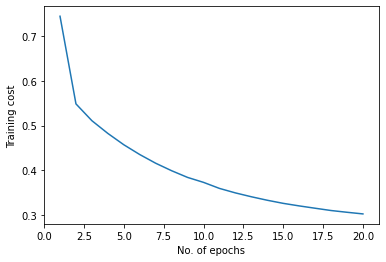

In [28]:
plt.plot(epoch_list,cost_list)
plt.xlabel("No. of epochs")
plt.ylabel("Training cost")
plt.xlim(0,21)
plt.show()

<div style='color: #5c6465;
           background-color: #b0f7fc;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: #53ebf8;
           font-family: "Times New Roman";'>
Evaluating Accuracy
<a class="anchor" id="13"></a>

Since we are working with regression, we shall use the mean squared error(MSE) for evaluating our model. We predict the target vector for the given test data(X_test) and calculate the mean squared error between the predicted values(y_test_pred) and the actual target values of the test data(y_test). We also calculate the mean squared error(MSE) for the training data.


In [29]:
y_test_pred = linear_regression(X_test,w,b)
y_train_pred = linear_regression(X_train,w,b)
test_MSE  = mean_squared_loss(y_test_pred,y_test).mean()
train_MSE = mean_squared_loss(y_train_pred,y_train).mean()
print(f'Test error is {test_MSE}\nTrain error is {train_MSE}')

Test error is 0.24016819865574482
Train error is 0.30209472446589636


With this you're good to go with performing linear regression on data sets!
<br>Reviews and edits are always welcome. 
<br>Let's share and grow :)